In [1]:
#import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils import resample
import seaborn as sns

In [2]:
# import dataset
main_df = pd.read_csv("C:\\Users\d816660\OneDrive - Telstra\Personal\ML\Coursera\ML Capstone Project\Data\ACCIDENT\ACCIDENT.csv")

C:\Users\d816660\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
main_df.head()


,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,...,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE,Atmosph Cond Desc,Surface Cond Desc
0,T20060000010,13/01/2006,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,...,1,0,5,1,1,Cross intersection,3,60,Clear,Dry
1,T20060000018,13/01/2006,19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,...,1,0,3,1,2,T intersection,3,70,Clear,Dry
2,T20060000022,14/01/2006,12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,MEL,...,0,0,1,1,5,Not at intersection,2,100,Clear,Dry
3,T20060000023,14/01/2006,11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,0,0,1,1,2,T intersection,2,80,Clear,Dry
4,T20060000026,14/01/2006,10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,MEL,...,3,0,0,1,5,Not at intersection,3,50,Clear,Dry


In [4]:
# filter required features
main_df2 = main_df[['ACCIDENT_NO','Light Condition Desc', 'Road Geometry Desc', 'SPEED_ZONE','Atmosph Cond Desc', 'Surface Cond Desc','SEVERITY' ]]

In [5]:
main_df2.head()

,ACCIDENT_NO,Light Condition Desc,Road Geometry Desc,SPEED_ZONE,Atmosph Cond Desc,Surface Cond Desc,SEVERITY
0,T20060000010,Day,Cross intersection,60,Clear,Dry,3
1,T20060000018,Day,T intersection,70,Clear,Dry,3
2,T20060000022,Day,Not at intersection,100,Clear,Dry,2
3,T20060000023,Day,T intersection,80,Clear,Dry,2
4,T20060000026,Day,Not at intersection,50,Clear,Dry,3


In [6]:
# update column names
accident_df = main_df2.rename(columns={"Light Condition Desc" : "LIGHTCOND", "Road Geometry Desc" : "ROADGEOM", "Atmosph Cond Desc" : "WEATHCOND", "Surface Cond Desc" : "SURFACECOND"})

In [7]:
accident_df.head()


,ACCIDENT_NO,LIGHTCOND,ROADGEOM,SPEED_ZONE,WEATHCOND,SURFACECOND,SEVERITY
0,T20060000010,Day,Cross intersection,60,Clear,Dry,3
1,T20060000018,Day,T intersection,70,Clear,Dry,3
2,T20060000022,Day,Not at intersection,100,Clear,Dry,2
3,T20060000023,Day,T intersection,80,Clear,Dry,2
4,T20060000026,Day,Not at intersection,50,Clear,Dry,3


In [8]:
# Replace unknown values with NaN
accident_df.replace("Unknown",np.nan, inplace=True)

In [9]:
# Replace Unknown (NaN) value with common value of the data set
accident_df["LIGHTCOND"].replace(np.nan, "Day", inplace = True)


In [10]:
#Encoding Light Conditions ( 0 = Light, 1 = Medium, 2 = Dark )
accident_df["LIGHTCOND"].replace("Day", 0 , inplace = True)
accident_df["LIGHTCOND"].replace("Dark Street lights on", 1 , inplace = True)
accident_df["LIGHTCOND"].replace("Dusk/Dawn", 1 , inplace = True)
accident_df["LIGHTCOND"].replace("Dark No street lights", 2 , inplace = True)
accident_df["LIGHTCOND"].replace("Dark Street lights unknown", 1 , inplace = True) # Replace unknown with common value
accident_df["LIGHTCOND"].replace("Dark Street lights off", 2 , inplace = True)

In [11]:
accident_df["ROADGEOM"].value_counts()

Not at intersection      101487
T intersection            47220
Cross intersection        46357
Multiple intersection      4133
Y intersection              573
Dead end                    155
Private property              9
Road closure                  5
Name: ROADGEOM, dtype: int64

In [12]:
# Replace Unknown (NaN) value with common value of the data set
accident_df["ROADGEOM"].replace(np.nan, "Not at intersection", inplace = True)

In [13]:
# Encoding Road Geometry ( 0 = Main Road, 1 = Intersections, 2 = By roads/Private Roads )
accident_df["ROADGEOM"].replace("Not at intersection", 0 , inplace = True)
accident_df["ROADGEOM"].replace("T intersection", 1 , inplace = True)
accident_df["ROADGEOM"].replace("Cross intersection", 1 , inplace = True)
accident_df["ROADGEOM"].replace("Multiple intersection", 1 , inplace = True)
accident_df["ROADGEOM"].replace("Y intersection", 1 , inplace = True) 
accident_df["ROADGEOM"].replace("Dead end", 2 , inplace = True)
accident_df["ROADGEOM"].replace("Private property", 2 , inplace = True)
accident_df["ROADGEOM"].replace("Road closure", 2 , inplace = True)

In [14]:
accident_df["SPEED_ZONE"].value_counts()

60     68028
50     35605
100    30810
80     27296
70     14954
999    10413
40      8708
110     2125
90       934
888      916
30       266
777      243
75        62
Name: SPEED_ZONE, dtype: int64

In [15]:
# Replace incorrect speed with common values
accident_df["SPEED_ZONE"].replace(999, 60 , inplace = True)
accident_df["SPEED_ZONE"].replace(777, 60 , inplace = True)
accident_df["SPEED_ZONE"].replace(888, 60 , inplace = True)

In [16]:
accident_df["SPEED_ZONE"].value_counts()

60     79600
50     35605
100    30810
80     27296
70     14954
40      8708
110     2125
90       934
30       266
75        62
Name: SPEED_ZONE, dtype: int64

In [17]:
accident_df["WEATHCOND"].value_counts()

Clear           161833
Raining          21610
Not known        14376
Fog               1504
Strong winds       390
Dust               389
Smoke              211
Snowing             47
Name: WEATHCOND, dtype: int64

In [18]:
# Encoding weather conditions ( 0 = clear, 1 = overcast and cloudy, 2 = Windy, 3 = Rain and Snow )

accident_df["WEATHCOND"].replace("Clear", 0 , inplace = True)
accident_df["WEATHCOND"].replace("Raining", 3 , inplace = True)
accident_df["WEATHCOND"].replace("Not known", 0 , inplace = True) # Replace Not Known ones with common ones
accident_df["WEATHCOND"].replace("Fog", 1 , inplace = True)
accident_df["WEATHCOND"].replace("Strong winds", 2 , inplace = True)
accident_df["WEATHCOND"].replace("Dust", 2 , inplace = True)
accident_df["WEATHCOND"].replace("Smoke", 2 , inplace = True)
accident_df["WEATHCOND"].replace("Snowing", 3 , inplace = True)


In [19]:
accident_df["WEATHCOND"].value_counts()

0    176209
3     21657
1      1504
2       990
Name: WEATHCOND, dtype: int64

In [20]:
accident_df["SURFACECOND"].value_counts()

Dry      157828
Wet       31578
Muddy       431
Icy         334
Snowy        81
Name: SURFACECOND, dtype: int64

In [21]:
# Replace Unknown (NaN) value with common value of the data set
accident_df["SURFACECOND"].replace(np.nan, "Dry", inplace = True)

In [22]:
# Encoding Surface Condition ( 0 = Dry, 1 = Mushy, 2 = Wet )
accident_df["SURFACECOND"].replace("Dry", 0 , inplace = True)
accident_df["SURFACECOND"].replace("Wet", 2 , inplace = True)
accident_df["SURFACECOND"].replace("Muddy", 1 , inplace = True)
accident_df["SURFACECOND"].replace("Icy", 2 , inplace = True)
accident_df["SURFACECOND"].replace("Snowy", 2 , inplace = True)

In [23]:
accident_df["SURFACECOND"].value_counts()

0    167936
2     31993
1       431
Name: SURFACECOND, dtype: int64

In [24]:
accident_df.head(10)

,ACCIDENT_NO,LIGHTCOND,ROADGEOM,SPEED_ZONE,WEATHCOND,SURFACECOND,SEVERITY
0,T20060000010,0,1,60,0,0,3
1,T20060000018,0,1,70,0,0,3
2,T20060000022,0,0,100,0,0,2
3,T20060000023,0,1,80,0,0,2
4,T20060000026,0,0,50,0,0,3
5,T20060000028,0,1,100,0,0,2
6,T20060000035,0,0,100,0,0,2
7,T20060000042,1,0,70,0,0,2
8,T20060000044,0,1,80,0,0,2
9,T20060000046,0,0,60,0,0,3


In [25]:
accident_df["LIGHTCOND"] = accident_df["LIGHTCOND"].astype(int)
accident_df["ROADGEOM"] = accident_df["ROADGEOM"].astype(int)
accident_df["SPEED_ZONE"] = accident_df["SPEED_ZONE"].astype(int)
accident_df["WEATHCOND"] = accident_df["WEATHCOND"].astype(int)
accident_df["SURFACECOND"] = accident_df["SURFACECOND"].astype(int)
accident_df["SEVERITY"] = accident_df["SEVERITY"].astype(int)


In [26]:
accident_df.head(10)

,ACCIDENT_NO,LIGHTCOND,ROADGEOM,SPEED_ZONE,WEATHCOND,SURFACECOND,SEVERITY
0,T20060000010,0,1,60,0,0,3
1,T20060000018,0,1,70,0,0,3
2,T20060000022,0,0,100,0,0,2
3,T20060000023,0,1,80,0,0,2
4,T20060000026,0,0,50,0,0,3
5,T20060000028,0,1,100,0,0,2
6,T20060000035,0,0,100,0,0,2
7,T20060000042,1,0,70,0,0,2
8,T20060000044,0,1,80,0,0,2
9,T20060000046,0,0,60,0,0,3


In [27]:
accident_df["SEVERITY"].value_counts()

3    128615
2     68064
1      3677
4         4
Name: SEVERITY, dtype: int64

In [28]:
# Encode serverity ( 0 = Fatal and Serious, 1 = Non Serious/Fatal )

accident_df["SEVERITY"].replace(1, 0 , inplace = True)
accident_df["SEVERITY"].replace(2, 0 , inplace = True)
accident_df["SEVERITY"].replace(3, 1 , inplace = True)
accident_df["SEVERITY"].replace(4, 1 , inplace = True)


In [29]:
accident_df["SEVERITY"].value_counts()

1    128619
0     71741
Name: SEVERITY, dtype: int64

In [30]:
accident_df["SEVERITY"] = accident_df["SEVERITY"].astype(int)

In [31]:
accident_df.head()

,ACCIDENT_NO,LIGHTCOND,ROADGEOM,SPEED_ZONE,WEATHCOND,SURFACECOND,SEVERITY
0,T20060000010,0,1,60,0,0,1
1,T20060000018,0,1,70,0,0,1
2,T20060000022,0,0,100,0,0,0
3,T20060000023,0,1,80,0,0,0
4,T20060000026,0,0,50,0,0,1


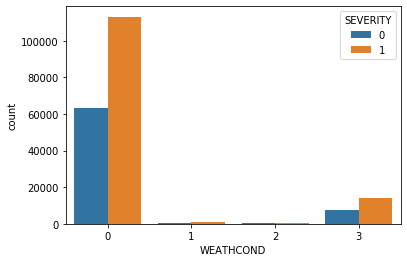

In [32]:
ax = sns.countplot(x = "WEATHCOND", hue = "SEVERITY", data = accident_df )

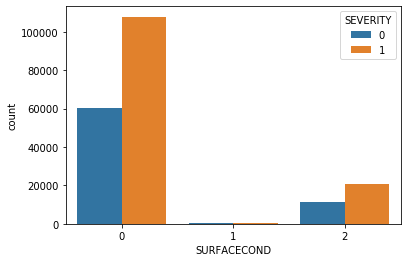

In [33]:
ax = sns.countplot(x = "SURFACECOND", hue = "SEVERITY", data = accident_df )

In [34]:
# Balance the data set by downsampling

accident_df_maj = accident_df[accident_df.SEVERITY == 1 ]
accident_df_min = accident_df[accident_df.SEVERITY == 0 ]

accident_df_maj_dsample = resample(accident_df_maj, replace = False, n_samples = 71741, random_state = 123 )

accident_df_balance = pd.concat([accident_df_maj_dsample, accident_df_min])

accident_df_balance["SEVERITY"].value_counts()

1    71741
0    71741
Name: SEVERITY, dtype: int64

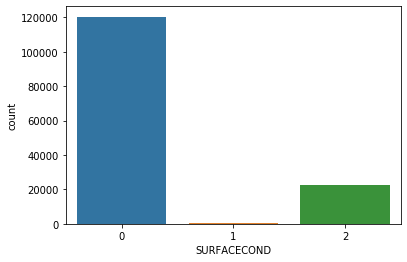

In [35]:
ax = sns.countplot(x = "SURFACECOND", data = accident_df_balance )

In [36]:
# ML Feature Sets

X = accident_df_balance[["LIGHTCOND", "ROADGEOM", "WEATHCOND", "SURFACECOND"]].values
y = accident_df_balance[["SEVERITY"]].values

# Normalize Data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [37]:
# Train and Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4 )
print('Train set: ', X_train.shape, y_train.shape )
print('Test set: ', X_test.shape, y_train.shape )


Train set:  (114785, 4) (114785, 1)
Test set:  (28697, 4) (114785, 1)


## ML Models

### K Nearest Neighbour ( KNN )

In [38]:
# K Nearest Neighbor ( KNN )
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

C:\Users\d816660\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
# Predicting
yhat = knn.predict(X_test)
yhat[0:5]

array([1, 0, 0, 0, 0])

In [40]:
# Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy : ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy :  0.5323430761859128
Test set Accuracy :  0.533714325539255


In [41]:
# Calculate accuracy for different Ks to find best K for the model
k_range = range(1,25)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train )
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
print(scores)    

C:\Users\d816660\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\d816660\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\d816660\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\d816660\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\d816660\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversion

[0.5335749381468446, 0.5394640554761821, 0.5412760915775168, 0.5397079834129003, 0.533714325539255, 0.5397428302610029, 0.5370247761090009, 0.5378959473115656, 0.5411367041851065, 0.5455274070460326, 0.5440638394257239, 0.5457016412865456, 0.5432275150712618, 0.5391504338432589, 0.543122974526954, 0.5447956232358783, 0.5442032268181343, 0.5443426142105446, 0.5433320556155695, 0.5432623619193644, 0.5361536049064363, 0.5436805240965955, 0.5427745060459281, 0.5423911907167996]


Text(0, 0.5, 'Testing Accuracy')

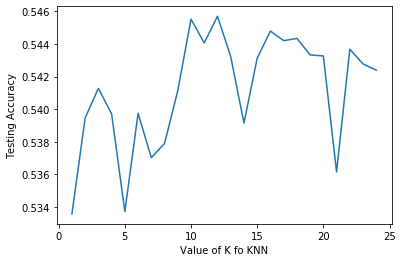

In [42]:
plt.plot(k_range, scores)
plt.xlabel('Value of K fo KNN')
plt.ylabel('Testing Accuracy')


In [43]:
print("The best accuracy with ", max(scores), "with k = ", scores.index(max(scores))+1 )

The best accuracy with  0.5457016412865456 with k =  12


In [50]:
# KNN Evaluation
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
print("jaccard_score : ", jaccard_score(y_test,y_pred))
print("f1_score : ", f1_score(y_test, y_pred, average = 'macro'))

jaccard_score :  0.3665525059090251
f1_score :  0.5423163350737625


### Decision Tree

In [53]:
# Decision Tree ML Model

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)

dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
# Prediction
predTree = dt.predict(X_test)
print(predTree [0:5])
print(y_test [0:5])

[1 0 0 1 0]
[[1]
 [0]
 [0]
 [0]
 [0]]


In [59]:
# Evaluation Decision Tree
print("DecisionTree's Accuracy : ", metrics.accuracy_score(y_test, predTree))
print("jaccard_score : ", jaccard_score(y_test, predTree))
print("f1_score : ", f1_score(y_test, predTree, average ='macro'))

DecisionTree's Accuracy :  0.5473742899954699
jaccard_score :  0.3072533333333333
f1_score :  0.5375340610118486


### Logistic Regression


In [62]:
# Logistic Regression ML algorithm

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

C:\Users\d816660\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
predLR = LR.predict(X_test)
print(predLR [0:5])
print(y_test [0:5])

[1 0 1 1 0]
[[1]
 [0]
 [0]
 [0]
 [0]]


In [67]:
# Evaluation Logistic Regression
print("DecisionTree's Accuracy : ", metrics.accuracy_score(y_test, predLR))
print("jaccard_score : ", jaccard_score(y_test, predLR))
print("f1_score : ", f1_score(y_test, predLR, average ='macro'))

DecisionTree's Accuracy :  0.546259190856187
jaccard_score :  0.3345428527623039
f1_score :  0.5425502025607187
